In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("../doc/binary-train.csv")
test = pd.read_csv("../doc/binary-test.csv")

In [4]:
train.head()

,Unnamed: 0,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Unknown-Work_Cla,Federal-gov,Local-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Class-binary
0,0,39,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,50,83311,13,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,38,215646,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,53,234721,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,28,338409,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,Unnamed: 0,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Unknown-Work_Cla,Federal-gov,Local-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Class-binary
0,0,25,226802,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,38,89814,9,0,0,50,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,28,336951,12,0,0,40,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,3,44,160323,10,7688,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4,18,103497,10,0,0,30,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
train.drop(train.columns[0], axis=1, inplace=True)

In [7]:
test.drop(test.columns[0], axis=1, inplace=True)

In [8]:
train.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Unknown-Work_Cla,Federal-gov,Local-gov,Never-worked,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Class-binary
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Unknown-Work_Cla,Federal-gov,Local-gov,Never-worked,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Class-binary
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
#Correlation
#corr_df = train.corr()
#class_corr = corr_df['Class-binary']
#all_numb = np.arange(0,108)
#unwanted = np.where((class_corr >= -1e-2) & (class_corr <=1e-2))[0]
#wanted = np.delete(all_numb, wanted)
#train.iloc[:,unwanted]

In [11]:
X = train.iloc[:,np.arange(0,106)]

In [12]:
y = train.iloc[:,106]

In [13]:
Xtest = test.iloc[:,np.arange(0,106)]

In [14]:
ytest = test.iloc[:,106]

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.metrics import mean_squared_error as mse

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

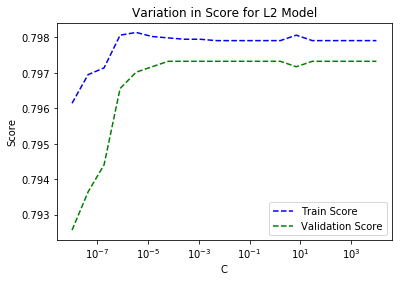

In [79]:
train_error = []
val_error = []

for i in np.logspace(-8,4,20):
    lr = LogisticRegression(C=i, penalty = 'l2')
    lr.fit(X_train,y_train)
    train_error.append(lr.score(X_train, y_train))
    val_error.append(lr.score(X_val, y_val))
plt.semilogx(np.logspace(-8,4,20),train_error,'b--', label = "Train Score")
plt.semilogx(np.logspace(-8,4,20),val_error,'g--', label = "Validation Score")
plt.legend()
plt.title("Variation in Score for L2 Model")
plt.xlabel("C")
plt.ylabel("Score")
plt.savefig('../doc/l2.png')

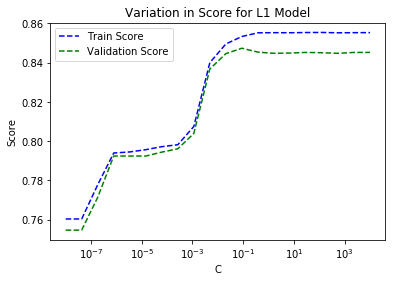

In [80]:
train_error = []
val_error = []

for i in np.logspace(-8,4,20):
    lr = LogisticRegression(C=i, penalty = "l1")
    lr.fit(X_train,y_train)
    train_error.append(lr.score(X_train, y_train))
    val_error.append(lr.score(X_val, y_val))
plt.semilogx(np.logspace(-8,4,20),train_error,'b--', label = "Train Score")
plt.semilogx(np.logspace(-8,4,20),val_error,'g--', label = "Validation Score")
plt.legend()
plt.title("Variation in Score for L1 Model")
plt.xlabel("C")
plt.ylabel("Score")
plt.savefig('../doc/l1.png')

In [58]:
parameters = {'C': np.logspace(-4,4,9), 'penalty': ['l1','l2']}
lr = LogisticRegression()
cv = GridSearchCV(lr, parameters)
cv.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
cv.best_params_

{'C': 100.0, 'penalty': 'l1'}

In [60]:
cv.best_score_

0.85138662817481037

In [61]:
lr = LogisticRegression(C = 100, penalty='l1')

In [62]:
lr.fit(X,y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
lr.score(X,y)

0.85329074659869164

In [64]:
lr.score(Xtest,ytest)

0.85271174989251275

In [65]:
lr.coef_

array([[  2.51709421e-02,   7.02045475e-07,  -2.34999391e-02,
          3.19319011e-04,   6.46555527e-04,   2.94697536e-02,
         -2.23563896e+00,  -1.01021098e+00,  -1.69622944e+00,
         -5.07972969e+00,  -1.51393040e+00,  -1.33649523e+00,
         -2.00293286e+00,  -1.82415001e+00,  -7.33243863e+00,
         -1.93819963e+00,  -1.83089599e+00,  -1.40020279e+00,
         -2.55485847e+00,  -2.24647755e+00,  -2.45933312e+00,
         -2.15524273e+00,  -4.64744345e-01,  -4.70952871e-01,
          1.59545119e-01,   1.28495933e+00,  -1.05723248e+00,
          5.36923854e-01,  -1.48314838e+01,   1.06354263e+00,
         -6.88606800e-01,  -1.79939161e+00,   6.58867715e-01,
          1.81983728e-01,  -1.81076357e+00,  -2.28900863e+00,
         -1.93449227e+00,  -1.66978454e+00,  -5.03122987e-01,
         -5.24333358e-01,  -1.66038414e+00,  -4.51458449e-01,
          2.64520447e-01,  -1.51325531e+00,  -1.20418848e+00,
         -8.06090705e-01,  -1.34863371e+00,  -4.58656864e+00,
        

In [66]:
from sklearn.ensemble import RandomForestClassifier

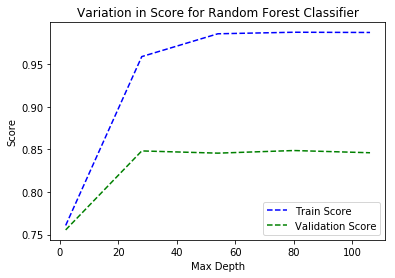

In [81]:
train_error = []
val_error = []

for i in np.linspace(2,106,5):
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train,y_train)
    train_error.append(rfc.score(X_train, y_train))
    val_error.append(rfc.score(X_val, y_val))
plt.plot(np.linspace(2,106,5),train_error,'b--', label = "Train Score")
plt.plot(np.linspace(2,106,5),val_error,'g--', label = "Validation Score")
plt.legend()
plt.title("Variation in Score for Random Forest Classifier")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.savefig('../doc/rfc.png')

In [67]:
parameters = {'max_depth': np.arange(1,106,5)}
rfc = RandomForestClassifier()
cv = GridSearchCV(rfc, parameters)
cv.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
cv.best_params_

{'max_depth': 16}

In [69]:
cv.best_score_

0.85817388900832281

In [70]:
rfc = RandomForestClassifier(max_depth=16)

In [71]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [ ]:
y_pred = rf.pred(Xtest)

In [72]:
rfc.score(X,y)

0.88741132029114589

In [85]:
y_pred = rfc.predict(Xtest)

In [73]:
rfc.score(Xtest,ytest)

0.86094220256740983

In [82]:
from sklearn.metrics import confusion_matrix

In [87]:
print(confusion_matrix(y_pred=y_pred,y_true=ytest))

[[11604   831]
 [ 1629  2217]]
